In [6]:
# summarize the number of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
    print(i, len(unique(data[:, i])))

(937, 50)
937
50
0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


In [3]:
# summarize the number of unique values for each column using numpy
from pandas import read_csv
# load the dataset
df = read_csv('oil-spill.csv', header=None)
# summarize the number of unique values in each column
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


In [4]:
# delete columns with a single unique value
from pandas import read_csv
# load the dataset
df = read_csv('oil-spill.csv', header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[22]
(937, 49)


In [9]:
# summarize the percentage of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('oil-spill.csv', delimiter=',')
for i in range(data.shape[1]):
    num = len(unique(data[:, i]))
    percentage=float(num)/data.shape[0] *100
    print('%d,%d,%.1f%%' %(i, num,percentage))

0,238,25.4%
1,297,31.7%
2,927,98.9%
3,933,99.6%
4,179,19.1%
5,375,40.0%
6,820,87.5%
7,618,66.0%
8,561,59.9%
9,57,6.1%
10,577,61.6%
11,59,6.3%
12,73,7.8%
13,107,11.4%
14,53,5.7%
15,91,9.7%
16,893,95.3%
17,810,86.4%
18,170,18.1%
19,53,5.7%
20,68,7.3%
21,9,1.0%
22,1,0.1%
23,92,9.8%
24,9,1.0%
25,8,0.9%
26,9,1.0%
27,308,32.9%
28,447,47.7%
29,392,41.8%
30,107,11.4%
31,42,4.5%
32,4,0.4%
33,45,4.8%
34,141,15.0%
35,110,11.7%
36,3,0.3%
37,758,80.9%
38,9,1.0%
39,9,1.0%
40,388,41.4%
41,220,23.5%
42,644,68.7%
43,649,69.3%
44,499,53.3%
45,2,0.2%
46,937,100.0%
47,169,18.0%
48,286,30.5%
49,2,0.2%


In [11]:
# summarize the percentage of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
    num = len(unique(data[:, i]))
    percentage = float(num) / data.shape[0] * 100
    if percentage < 1:
        print('%d, %d, %.1f%%' % (i, num, percentage))

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


In [14]:
from pandas import read_csv
df=read_csv('oil-spill.csv', header=None)
print(df.shape)
counts=df.nunique()
to_del=[i for i,v in enumerate(counts) if float(v)/df.shape[0]*100<1]
print(to_del)
df.drop(to_del,axis=1,inplace=True)
print(df.shape)

(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


In [16]:
#example of applying the variance threshold for feature selection
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
df=read_csv('oil-spill.csv', header=None)
data=df.values
X=data[:,:-1]
y=data[:,-1]
print(X.shape,y.shape)
transform=VarianceThreshold()
X_sel=transform.fit_transform(X)
print(X_sel.shape)

(937, 49) (937,)
(937, 48)


In [20]:
from numpy import arange
thresholds = arange(0.0, 0.55, 0.05)
results=list()
for t in thresholds:
    transform=VarianceThreshold(threshold=t)
    X_sel=transform.fit_transform(X)
    n_features=X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    results.append(n_features)

>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


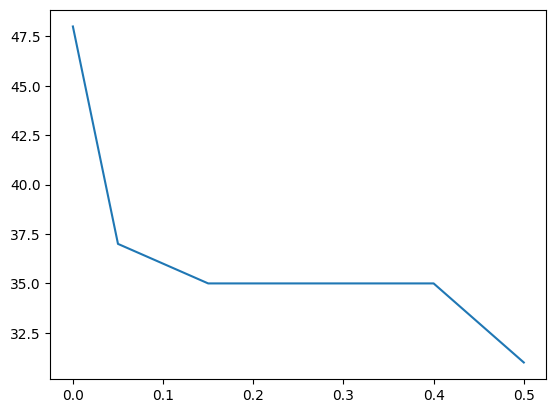

In [22]:
# explore the effect of the variance thresholds on the number of selected features
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
# load the dataset
df = read_csv('oil-spill.csv', header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
# define the transform
    transform = VarianceThreshold(threshold=t)
# transform the input data
    X_sel = transform.fit_transform(X)
# determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
# store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

In [23]:
# locate rows of duplicate data
from pandas import read_csv
# load the dataset
df = read_csv('iris.csv', header=None)
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

True
       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


In [24]:
df=read_csv('iris.csv',header=None)
print(df.shape)
dups=df.duplicated()
df.drop_duplicates(inplace=True)
print(df.shape)

(150, 5)
(147, 5)
